In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 1. California house prices

## EDA (Exploratory Data Analysis)

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Attribute Information:

    - MedInc        median income in block group
    
    - HouseAge      median house age in block group
    
    - AveRooms      average number of rooms per household
    
    - AveBedrms     average number of bedrooms per household
    
    - Population    block group population
    
    - AveOccup      average number of household members
    
    - Latitude      block group latitude
    
    - Longitude     block group longitude

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


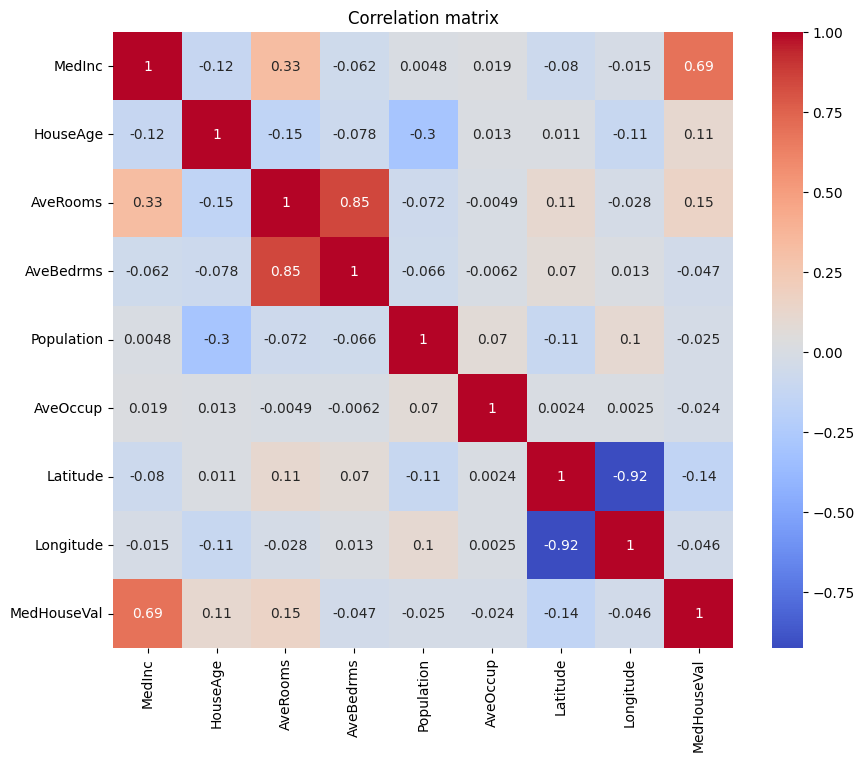

In [5]:
# Correlations

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation matrix")
plt.show()

## Train, test and evaluate the model

In [13]:
# Split data for training and testing

X = df.drop("MedHouseVal", axis=1)
Y = df["MedHouseVal"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # 80% od data used for training, 20% for testing

In [15]:
# Standardize data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
# Train the model

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, Y_train)  # Multivariate regression

Y_pred = lin_reg.predict(X_test_scaled)  # Predictions of the model

In [17]:
# Evaluation metrics

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MSE: 0.5388649914036732
MAE: 0.5353166913867703
RMSE: 0.7340742410708014
R^2: 0.5887810596909611


## Lasso, Ridge and Elastic Net

In [26]:
# Lasso regression

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, Y_train)

Y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso R^2: ", r2_score(Y_test, Y_pred_lasso))

Lasso R^2:  0.5879776979470092


In [30]:
# Ridge regression

ridge = Ridge(alpha=0.01)
ridge.fit(X_train_scaled, Y_train)

Y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge R^2: ", r2_score(Y_test, Y_pred_ridge))

Ridge R^2:  0.5887811771204805


In [31]:
# Elastic Net

elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train_scaled, Y_train)

Y_pred_elastic = elastic.predict(X_test_scaled)
print("Elastic Net R^2: ", r2_score(Y_test, Y_pred_elastic))

Elastic Net R^2:  0.5887930028918296


In [32]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "ElasticNet"],
    "R^2": [r2, r2_score(Y_test, Y_pred_ridge), r2_score(Y_test, Y_pred_lasso), r2_score(Y_test, Y_pred_elastic)]
})

In [33]:
results

,Model,R^2
0,Linear,0.588781
1,Ridge,0.588781
2,Lasso,0.587978
3,ElasticNet,0.588793


On this specific dataset, linear regression generalizes well, and regularization techniques don't make performance better.

# 2. Seattle house prices

## EDA

In [34]:
!wget https://github.com/Shreyas3108/house-price-prediction/raw/master/kc_house_data.csv

--2026-02-08 15:31:43--  https://github.com/Shreyas3108/house-price-prediction/raw/master/kc_house_data.csv
Risoluzione di github.com (github.com)... 140.82.121.4
Connessione a github.com (github.com)|140.82.121.4|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv [segue]
--2026-02-08 15:31:44--  https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv
Risoluzione di raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connessione a raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 2515206 (2,4M) [text/plain]
Salvataggio in: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2,40M  8,77MB/s    in 0,3s    

2026-02-08 15:31:45

In [35]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


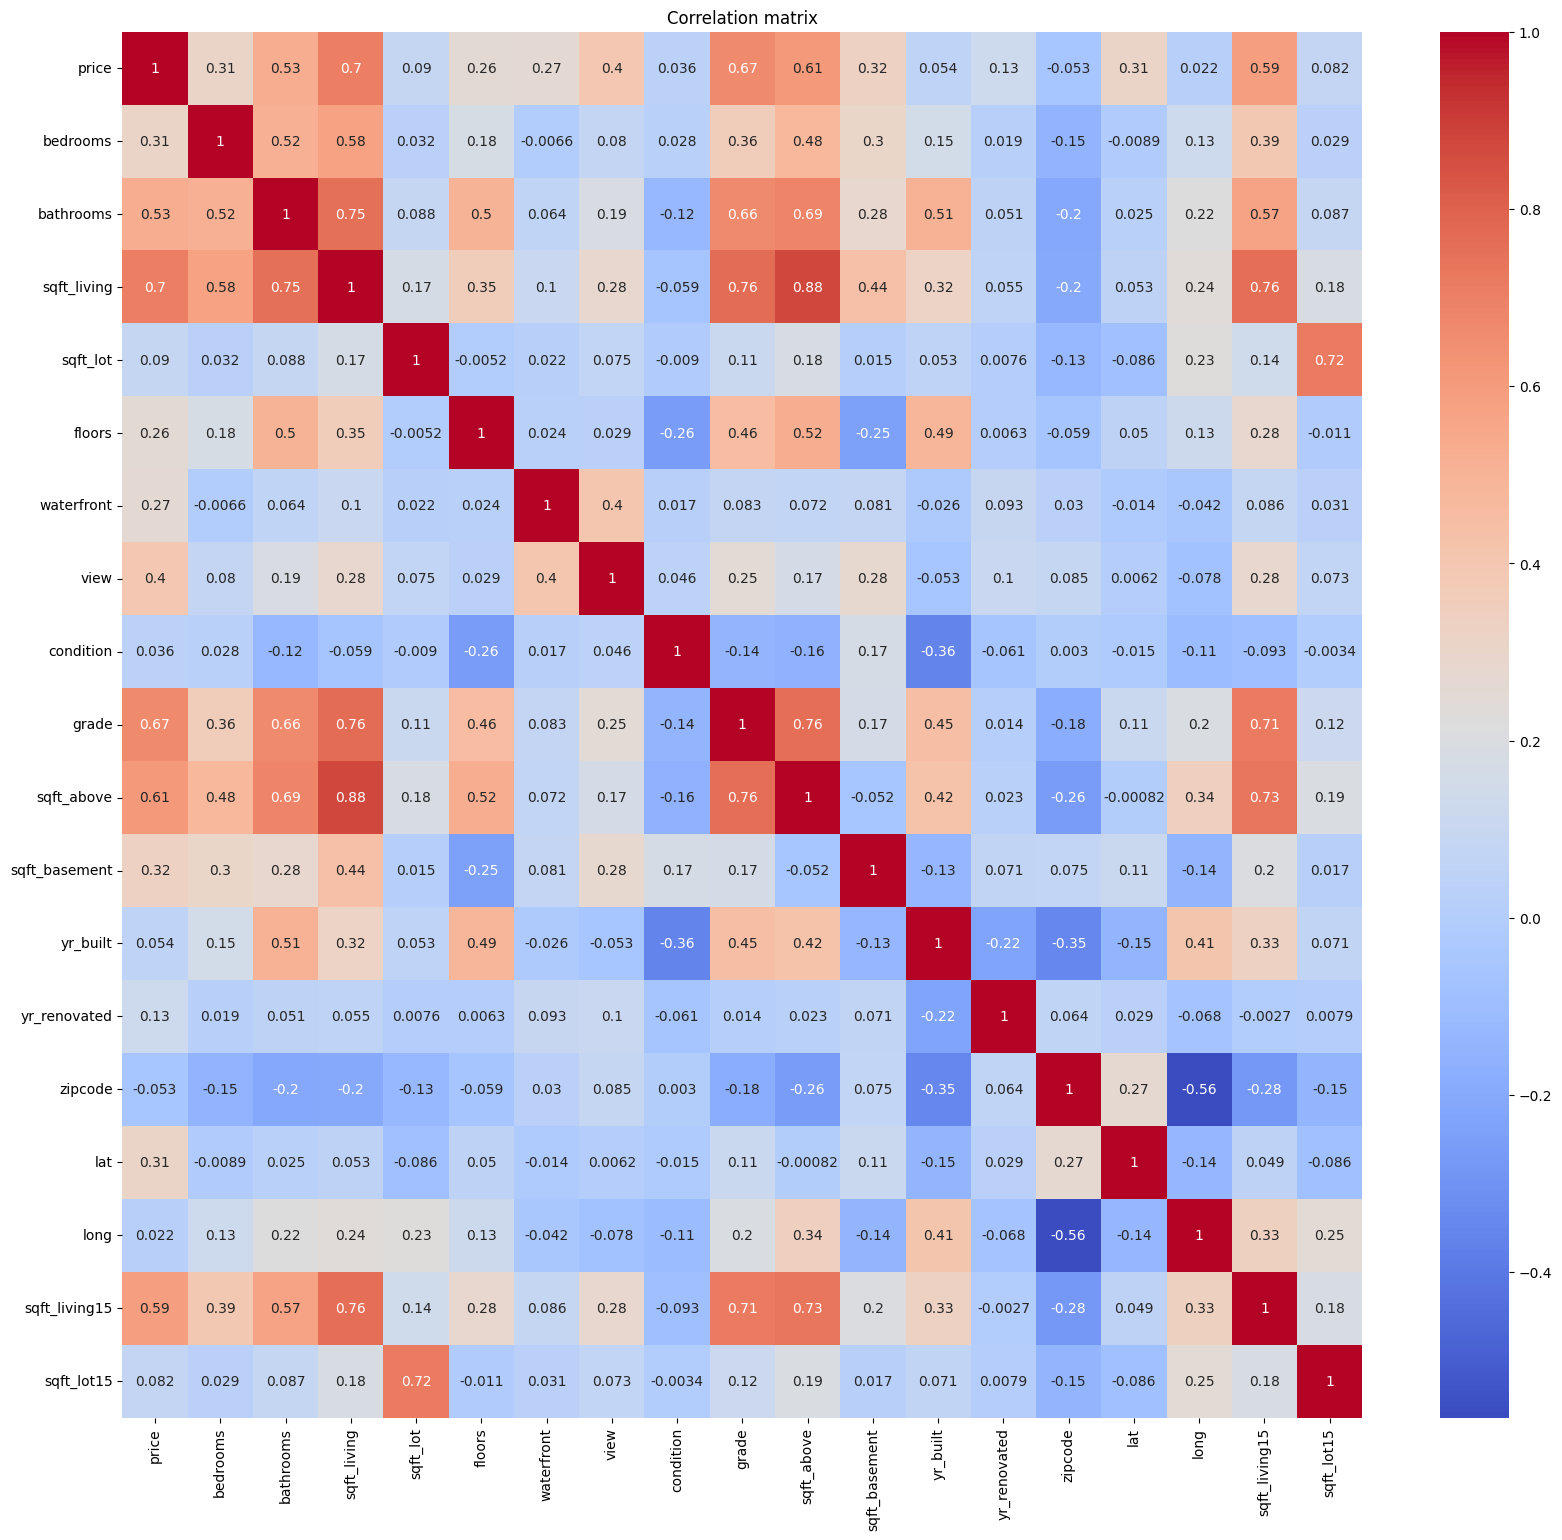

In [40]:
# Correlations

df_corr = df.drop(["id", "date"], axis=1)

plt.figure(figsize=(20,18))
sns.heatmap(df_corr.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation matrix")
plt.show()

## Train, test and evaluation

In [41]:
# Split data for training and testing

X = df.drop(["id", "date", "price"], axis=1)
Y = df["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)  # 80% of data used for training, 20% for testing

In [42]:
# Standardize data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [43]:
# Train the model

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, Y_train)  # Multivariate regression

Y_pred = lin_reg.predict(X_test_scaled)  # Predictions of the model

In [44]:
# Evaluation metrics

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

MSE: 45698165288.55128
MAE: 125222.29566827643
RMSE: 213771.29201216725
R^2: 0.6977168996048289


In [46]:
# Is there overfitting?

Y_train_pred = lin_reg.predict(X_train_scaled)

print("Train R^2: ", r2_score(Y_train, Y_train_pred))
print("Test R^2: ", r2_score(Y_test, Y_pred))

Train R^2:  0.6991021854487474
Test R^2:  0.6977168996048289


Linear regression has similar performances on the test and train dataset, suggesting that there is limited overfitting. I can use regularization, however, to improve coefficient stability

## Lasso, Ridge and ElasticNet

In [51]:
# Lasso regression

lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, Y_train)

Y_pred_lasso = lasso.predict(X_test_scaled)
print("Lasso R^2: ", r2_score(Y_test, Y_pred_lasso))

Lasso R^2:  0.6969235710423465


/home/asus/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.058e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


In [52]:
# Ridge regression

ridge = Ridge(alpha=0.01)
ridge.fit(X_train_scaled, Y_train)

Y_pred_ridge = ridge.predict(X_test_scaled)
print("Ridge R^2: ", r2_score(Y_test, Y_pred_ridge))

Ridge R^2:  0.6977168742159782


In [54]:
# Elastic Net

elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
elastic.fit(X_train_scaled, Y_train)

Y_pred_elastic = elastic.predict(X_test_scaled)
print("Elastic Net R^2: ", r2_score(Y_test, Y_pred_elastic))

Elastic Net R^2:  0.6974882635098059


In [55]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "ElasticNet"],
    "R^2": [r2, r2_score(Y_test, Y_pred_ridge), r2_score(Y_test, Y_pred_lasso), r2_score(Y_test, Y_pred_elastic)]
})

results

,Model,R^2
0,Linear,0.697717
1,Ridge,0.697717
2,Lasso,0.696924
3,ElasticNet,0.697488


In [56]:
# Coefficients comparison

coef_df = pd.DataFrame({
    "Linear": lin_reg.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "ElasticNet": elastic.coef_
}, index=X.columns)

coef_df


,Linear,Ridge,Lasso,ElasticNet
bedrooms,-31978.583247,-31978.516628,-31978.571589,-31409.225056
bathrooms,34170.647403,34170.626819,34170.581726,33997.620551
sqft_living,80144.328151,80144.280822,254158.917114,79741.020967
sqft_lot,3450.664665,3450.665837,3450.630436,3459.508961
floors,3801.318600,3801.336959,3801.316276,3956.682434
waterfront,47457.604003,47457.584472,47457.596861,47289.375070
view,40859.880119,40859.880010,40859.880591,40858.807086
condition,15983.536295,15983.553622,15983.524921,16128.352755
grade,110674.787799,110674.664379,110674.813353,109627.777530
sqft_above,74521.837439,74521.783695,-83061.345294,74061.717560


Ridge produces results similar to the linear model, while Lasso sometimes produces very different coefficients: it selects a dominant predictor and compensate by shrinking or flipping the sign of correlated variables. This happens with the variables sqft_living, sqft_above and sqft_basement.